<a href="https://colab.research.google.com/github/DitaNurA/Tubes_PCVK/blob/main/Tubes_CarPark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff3c8e04710>,
 <matplotlib.image.AxesImage at 0x7ff3bb0a81d0>)

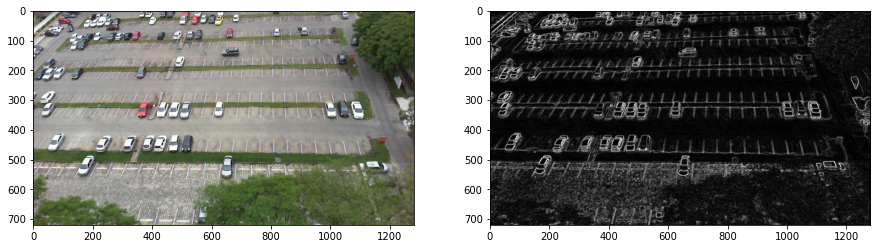

In [3]:
img0 = cv.imread('/content/drive/MyDrive/pcvk/2012-10-26_07_19_27.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)


img = cv.GaussianBlur(gray,(3,3),0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy,cmap = 'gray')


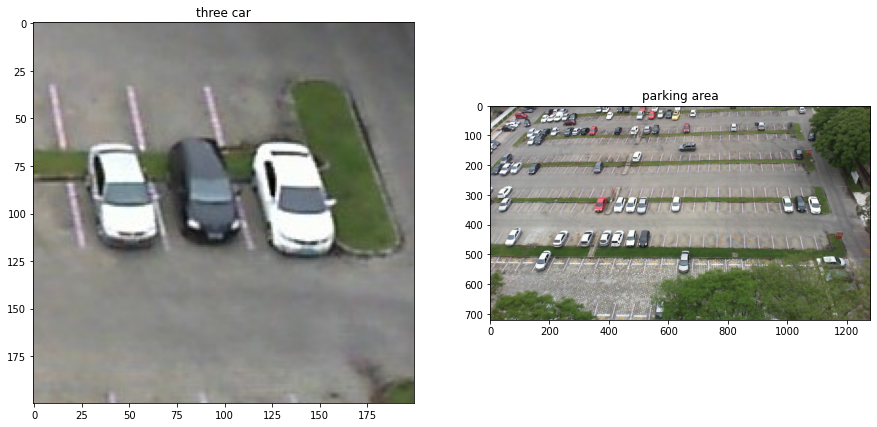

In [9]:


# panggil dan konversi warna agar sesuai dengan Matplotlib
img7 = cv.imread('/content/drive/MyDrive/pcvk/search1.jpg')
img7 =  cv.cvtColor(img7, cv.COLOR_BGR2RGB) # simpan dengan nama yang sama = ditumpuk

# panggil dan konversi warna agar sesuai dengan Matplotlib
img6 = cv.imread('/content/drive/MyDrive/pcvk/2012-10-26_07_19_27.jpg')
img6 =  cv.cvtColor(img6, cv.COLOR_BGR2RGB) 

plt.subplot(121),plt.imshow(img7), plt.title('three car')
plt.subplot(122),plt.imshow(img6), plt.title('parking area')
plt.show()


hasil metode cv.TM_CCOEFF : 


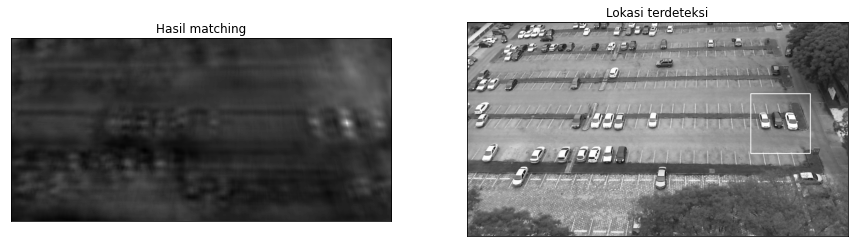

hasil metode cv.TM_CCOEFF_NORMED : 


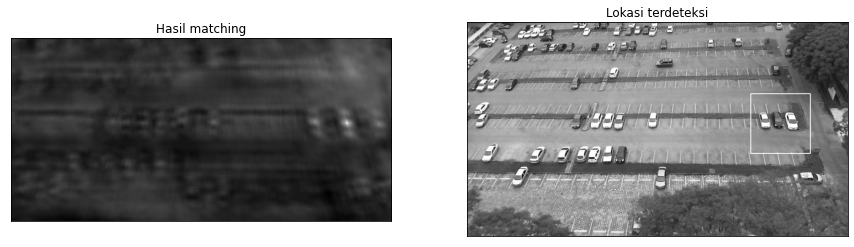

hasil metode cv.TM_CCORR : 


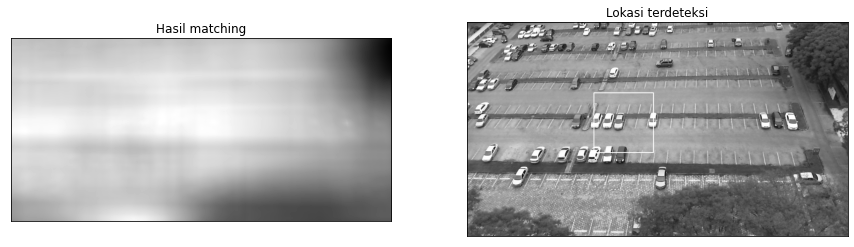

hasil metode cv.TM_CCORR_NORMED : 


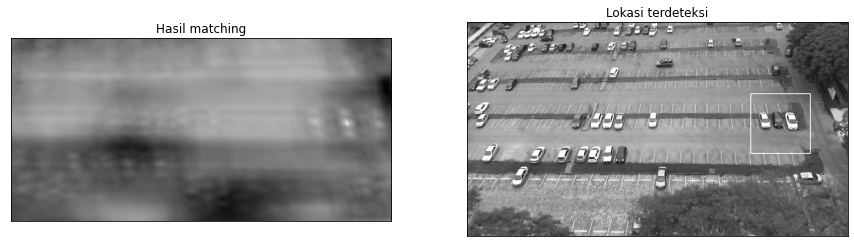

hasil metode cv.TM_SQDIFF : 


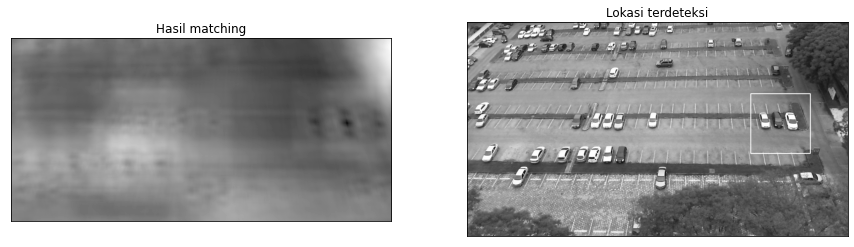

hasil metode cv.TM_SQDIFF_NORMED : 


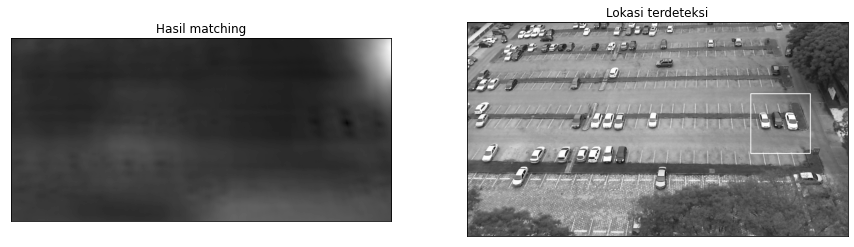

In [5]:
img = cv.imread('/content/drive/MyDrive/pcvk/2012-10-26_07_19_27.jpg',0)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/pcvk/search1.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (15,15)

for met in methods:
    img = img2.copy()
    method = eval(met)

    # menggunakan template matching
    res = cv.matchTemplate(img,template,method)

    # mencari ukuran citra template untuk menggambar kotak
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikit berbeda
    # sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    
    
    # buat persegi pada lokasi yang ditemukan
    cv.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan garis kotak

    print("hasil metode", met, ": " )
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])
    

    plt.show()

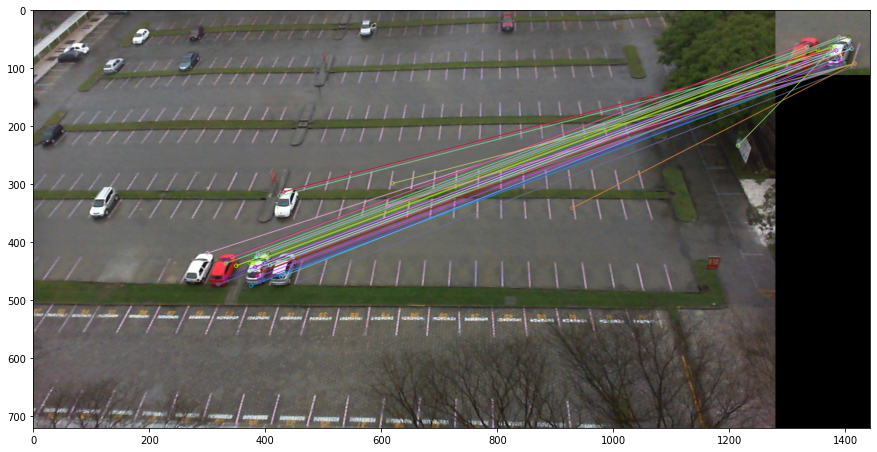

(<matplotlib.image.AxesImage at 0x7ff3b98b2890>, None)

In [6]:


# Gunakan gambar 
img1 = cv.imread('/content/drive/MyDrive/pcvk/2012-09-21_07_00_12.jpg')          # gambar yang dituju
img2 = cv.imread('/content/drive/MyDrive/pcvk/search2.jpg')             # gambar yang dicari
gray1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv.xfeatures2d.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None

# menggambar hasil match pada gambar baru (IMG3)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)),plt.show()

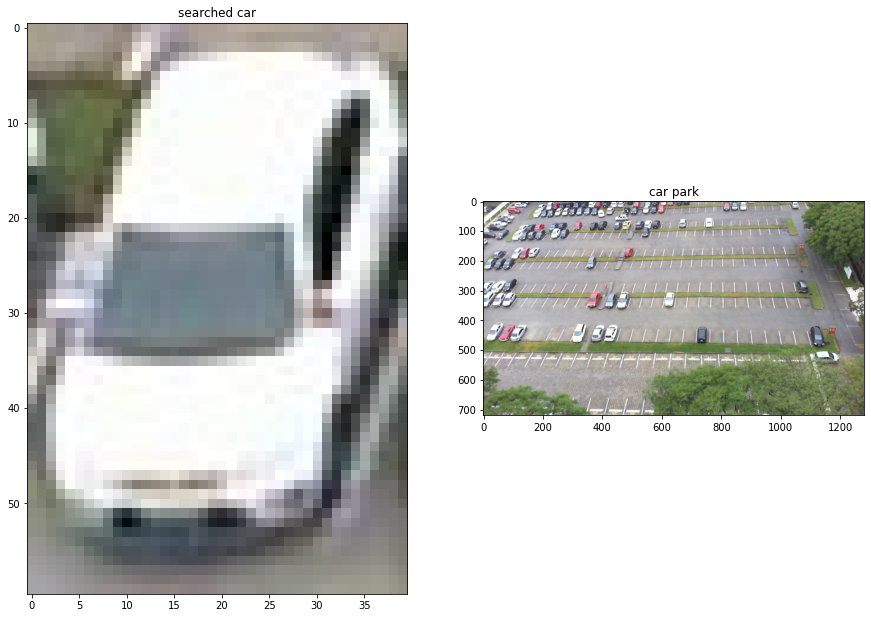

In [40]:


# panggil dan konversi warna agar sesuai dengan Matplotlib
car1 = cv.imread('/content/drive/MyDrive/pcvk/search3.jpg') 
car1 =  cv.cvtColor(car1, cv.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
car2 = cv.imread('/content/drive/MyDrive/pcvk/2012-11-09_07_26_34.jpg') 
car2 =  cv.cvtColor(car2, cv.COLOR_BGR2RGB) 

plt.subplot(121),plt.imshow(car1), plt.title('searched car')
plt.subplot(122),plt.imshow(car2), plt.title('car park')
plt.show()

Jumlah objek ditemukan  15


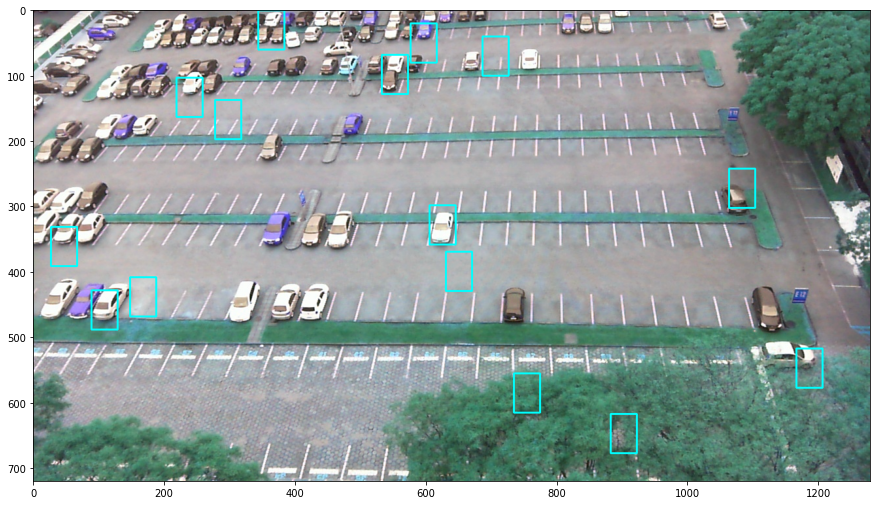

(<matplotlib.image.AxesImage at 0x7ff3b99fe110>, None)

In [44]:
## membaca gambar utuh untuk dicari
img_rgb = cv.imread('/content/drive/MyDrive/pcvk/2012-11-09_07_26_34.jpg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

## membaca template 
template = cv.imread('/content/drive/MyDrive/pcvk/search3.jpg',0)


## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# menggunakan metode COEFF-NORMALIZED
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik. 

threshold = 0.35
loc = np.where(res >= threshold)

## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0  # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
	## jika sudah ada, skip lokasi tersebut
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		## gambar persegi warna kuning dengan ketebalan dua poin
		cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
		for i in range(((pt[0])-25), ((pt[0])+25),1):
			## tambahkan koordinat x ke list
			lspoint.append(i)
		for k in range(((pt[1])-20), ((pt[1])+20),1):
			## tambahkan koordinat y ke list
			lspoint2.append(k)
		count+=1 ### berapa jumlah matching yang ditemukan?
	else:
		continue
print ("Jumlah objek ditemukan ", count)

## tampilkan dengan imshow	
plt.imshow(img_rgb), plt.show()

In [8]:
!pip uninstall opencv-python -y

# Downgrade versi OpenCV menjadi versi 3
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_contrib_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl (30.6 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 3.4.2.17
    Uninstalling opencv-contrib-python-3.4.2.17:
      Successfully uninstalled opencv-contrib-python-3.4.2.17
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imgaug 0.2.9 requires opencv-python, which is not installed.
dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
albumentations 0.1.12 requires o